### Task # 12:
- This is task # 12 overall, and task 2 of Week 6
### Task # 02:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Problem # 2.1:
Predicting Employee Attrition Using Logistic Regression
Dataset: HR Analytics Employee Attrition Dataset

Preprocessing Steps:
- Handle missing values if any.
- Encode categorical variables (e.g., one-hot encoding for department, gender, etc.).
- Standardize numerical features.

Task: Implement logistic regression to predict employee attrition and evaluate the model
using precision, recall, and F1-score.

In [2]:
#importing the dataset
# File path to the dataset
fp = 'WA_Fn-UseC_-HR-Employee-Attrition.csv'

employee_df = pd.read_csv(fp)

# Null values check
#null values verification 
print(employee_df.columns[employee_df.isnull().any()])

#a look at the dataset
employee_df.head(3)


Index([], dtype='object')


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0


In [3]:
#Available column names
employee_df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [4]:
# so there are no null values lets proceed further
# employee_df['BusinessTravel'].value_counts()
# employee_df['Department'].value_counts()
# employee_df['EducationField'].value_counts()
# employee_df['MaritalStatus'].value_counts()
# employee_df['Gender'].value_counts()
# employee_df['JobRole']value_counts()

## All these variables are categorical so lets encode it with label encoder, we are not using hot encoding because we already have a large dataste with 
## many columns so one hot encoding will make it more complex

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Applying LabelEncoder to categorical columns
categorical_columns = ['BusinessTravel', 'Department', 'EducationField','Gender', 'JobRole', 'MaritalStatus','Over18','OverTime']


for col in categorical_columns:
    employee_df[col] = label_encoder.fit_transform(employee_df[col])

# Verifying the changes
employee_df[categorical_columns].head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,2,2,1,0,7,2,0,1
1,1,1,1,1,6,1,0,0
2,2,1,4,1,2,2,0,1
3,1,1,1,0,6,1,0,1
4,2,1,3,1,2,1,0,0


In [5]:
# lets have a look at our target variable 
employee_df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [6]:
# as we can see from above output our dataset is imbalance lets apply undersampling to balance the dataset
from imblearn.under_sampling import RandomUnderSampler

# defining target variable and features as Y and X respectively
X = employee_df.drop(['Attrition', 'EmployeeCount', 'EmployeeNumber'], axis=1)  # Dropping the target and non-predictive columns
Y = employee_df['Attrition']  # The target variable

# Converting target variable to binary values for(0 and 1)
Y = Y.map({'Yes': 1, 'No': 0})

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, Y)

# Converting the resampled arrays back to DataFrames
X_rus_df = pd.DataFrame(X_rus, columns=X.columns)
y_rus_df = pd.DataFrame(y_rus, columns=['Attrition'])

# Combining X and y to view the complete DataFrame
rus_df = pd.concat([X_rus_df, y_rus_df], axis=1)
rus_df['Attrition'].value_counts()

Attrition
0    237
1    237
Name: count, dtype: int64

In [7]:
#as we can see from the above output we have now a balance dataset to be used 
#now lets have a look at possible columns that can be standardized
# List of selected columns to standardize
numerical_columns = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
    'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'StockOptionLevel',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

#this standard deviation will give us the idea , if the majority values are not near to 1 so we will apply standardization 
rus_df[numerical_columns].std()
#Before standardization

Age                           9.232097
DailyRate                   390.616351
DistanceFromHome              8.241896
HourlyRate                   20.150602
MonthlyIncome              4393.706891
MonthlyRate                7222.025231
NumCompaniesWorked            2.493892
PercentSalaryHike             3.714831
PerformanceRating             0.357242
StockOptionLevel              0.858134
TotalWorkingYears             7.528239
TrainingTimesLastYear         1.236253
WorkLifeBalance               0.743800
YearsAtCompany                5.951512
YearsInCurrentRole            3.374214
YearsSinceLastPromotion       3.167786
YearsWithCurrManager          3.446916
dtype: float64

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# # Standardizing the columns
rus_df[numerical_columns] = scaler.fit_transform(rus_df[numerical_columns])

rus_df[numerical_columns].std()
#After standardization

Age                        1.001057
DailyRate                  1.001057
DistanceFromHome           1.001057
HourlyRate                 1.001057
MonthlyIncome              1.001057
MonthlyRate                1.001057
NumCompaniesWorked         1.001057
PercentSalaryHike          1.001057
PerformanceRating          1.001057
StockOptionLevel           1.001057
TotalWorkingYears          1.001057
TrainingTimesLastYear      1.001057
WorkLifeBalance            1.001057
YearsAtCompany             1.001057
YearsInCurrentRole         1.001057
YearsSinceLastPromotion    1.001057
YearsWithCurrManager       1.001057
dtype: float64

In [9]:
#now the dataset has been balanced , standardized and encoded now its time for splitting the dataset into train and test 
#splitting for training and testing
from sklearn.model_selection import train_test_split


# Define features and target variable
X = X_rus_df  # Resampled and standardized features
Y = y_rus_df  # Resampled target

# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardizing features after split
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression
 
# Initialize and train the Logistic Regression model with more iterations
log_reg = LogisticRegression(random_state=42, max_iter=10000)
log_reg.fit(X_train_scaled, Y_train.values.ravel())

# Making predictions on the testing set
y_pred = log_reg.predict(X_test_scaled)


In [11]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report


# Evaluate the model
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

print("Confusion Matrix:")
print(confusion_matrix(Y_test, y_pred))

print("Classification Report:")
print(classification_report(Y_test, y_pred))

Precision: 0.73
Recall: 0.67
F1 Score: 0.70
Confusion Matrix:
[[35 12]
 [16 32]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.74      0.71        47
           1       0.73      0.67      0.70        48

    accuracy                           0.71        95
   macro avg       0.71      0.71      0.70        95
weighted avg       0.71      0.71      0.70        95



#### Problem # 2.2:
Classifying Credit Card Fraud Using Decision Trees

Dataset: Credit Card Fraud Detection Dataset

Preprocessing Steps:
- Handle missing values if any.
- Standardize features.

Task: Implement a decision tree classifier to classify credit card transactions as fraud or
not and evaluate the model using ROC-AUC and confusion matrix.

In [23]:
#importing dataset
fp = 'creditcard.csv'
credit_df = pd.read_csv(fp)

print(credit_df.columns[credit_df.isnull().any()])
credit_df.head(3)

Index([], dtype='object')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [20]:
#NO null values exist
#Target variable(incase of credit card there is possibility that normal transactions would have been more as compared to fraud
#due to which the dataset could be imbalanced) So lets have a look... 
credit_df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [24]:
#defining target and features as Y and X respectively
#before managing the imbalance dataset lets first standardize our dataset

X = credit_df.drop(columns=['Class'])
Y = credit_df['Class']

# Standardizing the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [27]:
#as we can see that we have highly imbalance dataset we can use 2 approaches oversampling and undersampling in this solution we will use Oversampling 
#methodology that is ADASYN
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_adasyn, Y_adasyn = adasyn.fit_resample(X_standard, Y)

# Converting the resampled arrays back to DataFrames
X_adasyn_df = pd.DataFrame(X_adasyn, columns=X.columns)
Y_adasyn_df = pd.DataFrame(Y_adasyn, columns=['Class'])

# Combine X and y to view the complete DataFrame
Credit_bal_df = pd.concat([X_adasyn_df, Y_adasyn_df], axis=1)

Credit_bal_df['Class'].value_counts()

Class
0    284315
1    284313
Name: count, dtype: int64

In [29]:
#from the above output we can say that our dataset is now fairly balance but we will use undersampling later and compare both results
#Now train and test split
#redifining our X and Y
X = Credit_bal_df.drop(columns=['Class'])
Y = Credit_bal_df['Class']

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [30]:
#decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Training the model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

ROC-AUC Score: 0.998


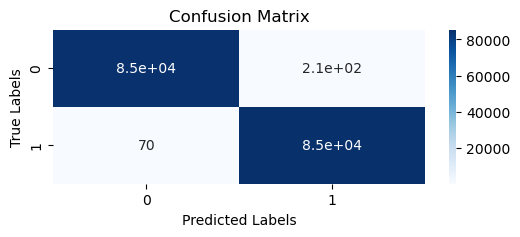

In [36]:
from sklearn.metrics import roc_auc_score, confusion_matrix

# Prediction on the test set
Y_pred = clf.predict(X_test)

# ROC-AUC score
roc_auc = roc_auc_score(Y_test, Y_pred)
print(f'ROC-AUC Score: {roc_auc:.3f}')

# confusion matrix
conf_mat = confusion_matrix(Y_test, Y_pred)
# Ploting the confusion matrix
plt.figure(figsize=(6, 2))
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [37]:
#now lets try the same model with undersampling
from imblearn.under_sampling import RandomUnderSampler


#redifing the Y while for X we will use the same X_standard
Y = credit_df['Class']

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_standard, Y)
# Converting the resampled arrays back to DataFrames
X_rus_df = pd.DataFrame(X_rus, columns=X.columns)
y_rus_df = pd.DataFrame(y_rus, columns=['Class'])

# Combining X and y to view the complete DataFrame
rus_df = pd.concat([X_rus_df, y_rus_df], axis=1)
rus_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split


X = rus_df.drop(columns=['Class'])
Y = rus_df['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Training the model
clf2 = DecisionTreeClassifier(random_state=42)
clf2.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

ROC-AUC Score: 0.895


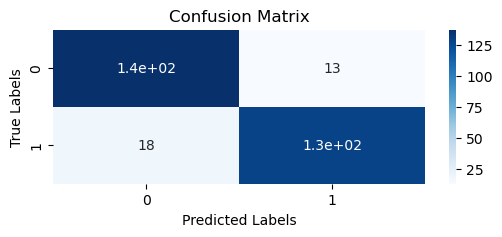

In [40]:
from sklearn.metrics import roc_auc_score, confusion_matrix

# Prediction on the test set
Y_pred = clf2.predict(X_test)

# ROC-AUC score
roc_auc = roc_auc_score(Y_test, Y_pred)
print(f'ROC-AUC Score: {roc_auc:.3f}')

# confusion matrix
conf_mat = confusion_matrix(Y_test, Y_pred)
# Ploting the confusion matrix
plt.figure(figsize=(6, 2))
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

- By looking at the outputs for undersampling and ADASYN we see that oversampling ADASYN worked better for our task

#### Problem # 2.3:
Predicting Heart Disease Using Logistic Regression
Dataset: Heart Disease Dataset
Preprocessing Steps:
- Handle missing values (e.g., fill missing values with mean).
- Encode categorical variables (e.g., one-hot encoding for gender, chest pain type, etc.).
- Standardize numerical features.

Task: Implement logistic regression to predict heart disease and evaluate the model using
accuracy and ROC-AUC.


In [43]:
#importing the dataset
fp = 'heart_disease_data.csv'
heart_df = pd.read_csv(fp)

#check for columns with null values
print(heart_df.columns[heart_df.isnull().any()])
heart_df.head(10)

Index([], dtype='object')


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [45]:
#as we inspect the above dataset we see that the dataset is already encoded
# so now lets standardize some variables
from sklearn.preprocessing import StandardScaler

# numerical features to be standardize
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Standardizing
scaler = StandardScaler()
heart_df[numerical_features] = scaler.fit_transform(heart_df[numerical_features])

In [53]:
#train and test split
from sklearn.model_selection import train_test_split

# Defining Features and target variable
X = heart_df.drop('target', axis=1)
Y = heart_df['target']

# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [54]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42, max_iter=1000)

# Training
logreg.fit(X_train, Y_train)


LogisticRegression(max_iter=1000, random_state=42)

Accuracy: 0.813
ROC-AUC: 0.88
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



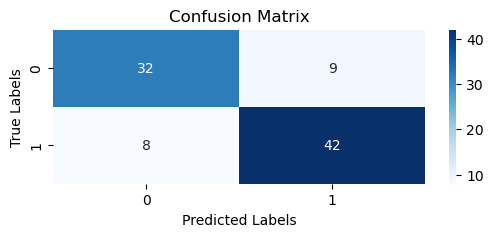

In [60]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# Prediction on the test set
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]
# accuracy
accuracy = accuracy_score(Y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

# ROC-AUC
roc_auc = roc_auc_score(Y_test, y_prob)
print(f'ROC-AUC: {roc_auc:.2f}')

# classification report
print(classification_report(Y_test, y_pred))

# Ploting the confusion matrix
conf_mat = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(6, 2))
sns.heatmap(conf_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### Problem # 2.4:
Classifying Emails as Spam Using Decision Trees
Dataset: Spam Email Dataset
Preprocessing Steps:
- Handle missing values if any.
- Standardize features.
- Encode categorical variables if present.

Task: Implement a decision tree classifier to classify emails as spam or not and evaluate
the model using precision, recall, and F1-score.

In [61]:
#importing the dataset
file_path = 'mail_data.csv'
mail_df = pd.read_csv(file_path)

print(mail_df.columns[mail_df.isnull().any()])

mail_df.head(3)

Index([], dtype='object')


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [62]:
#label encoding for the target variable
mail_df.loc[mail_df['Category']=='spam','Category',] = 0
mail_df.loc[mail_df['Category']=='ham','Category',] = 1

mail_df.head(3)

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...


In [63]:
# separating the feature and target variable
X = mail_df['Message']
y = mail_df['Category']

In [64]:
#train test splitting
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [65]:
# a text data cannot be given to a Ml model , instead it should be converted in an understandable format
from sklearn.feature_extraction.text import TfidfVectorizer

feature_extraction = TfidfVectorizer(min_df = 1,stop_words='english',lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

y_test = y_test.astype('int')
y_train = y_train.astype('int')

In [66]:
# model training
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_features, y_train)

DecisionTreeClassifier(random_state=42)

In [67]:
# Evaluating the model
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict on the test set
y_pred = dt_model.predict(X_test_features)

#precision
precision = precision_score(y_test, y_pred)

#recall score
recall = recall_score(y_test, y_pred)

#f1_score
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

Precision: 0.9785
Recall: 0.9886
F1-Score: 0.9835


#### Problem # 2.5:
Predicting Customer Satisfaction Using Logistic Regression
Dataset: Customer Satisfaction Dataset
Preprocessing Steps:
- Handle missing values (e.g., fill missing values with median).
- Encode categorical variables (e.g., one-hot encoding for region).
- Standardize numerical features.

Task: Implement logistic regression to predict customer satisfaction and evaluate the
model using accuracy and confusion matrix

In [68]:
#importing the dataset
fp = 'customer_survey_1.csv'
customer_df = pd.read_csv(fp)

#check for null
print(customer_df.columns[customer_df.isnull().any()])

#a look at the dataset
customer_df.head(5)

Index(['Arrival Delay in Minutes'], dtype='object')


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [69]:
#a look at the percentage
customer_df['Arrival Delay in Minutes'].isnull().sum()/customer_df.shape[0]*100

0.31952571604558055

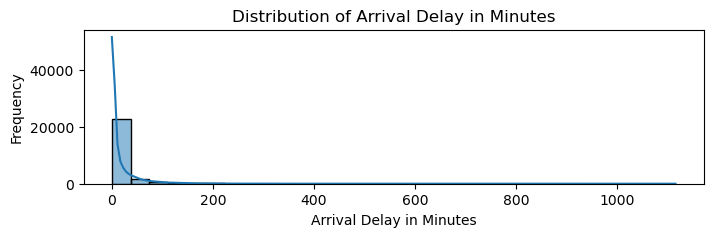

In [70]:

# Plotting the distribution of 'Arrival Delay in Minutes'
plt.figure(figsize=(8,2))
sns.histplot(customer_df['Arrival Delay in Minutes'].dropna(), kde=True, bins=30)
plt.title('Distribution of Arrival Delay in Minutes')
plt.xlabel('Arrival Delay in Minutes')
plt.ylabel('Frequency')
plt.show()

In [71]:
#it seems to be very skewed on the left side so we will use median

customer_df['Arrival Delay in Minutes'] = customer_df['Arrival Delay in Minutes'].fillna(customer_df['Arrival Delay in Minutes'].median())

#verification
print(customer_df.columns[customer_df.isnull().any()])

Index([], dtype='object')


In [72]:
#lets do label encoding for our target variable
customer_df.loc[customer_df['satisfaction']=='satisfied','satisfaction',] = 1
customer_df.loc[customer_df['satisfaction']=='neutral or dissatisfied','satisfaction',] = 0

#checking the labeled categories
customer_df['satisfaction'].value_counts()

satisfaction
0    14573
1    11403
Name: count, dtype: int64

In [73]:
# lets do some label encoding for other columns which are required
customer_df.loc[customer_df['Gender']=='Female','Gender',] = 1
customer_df.loc[customer_df['Gender']=='Male','Gender',] = 0

In [74]:
#lets have a look at the datatypes , to see if we need some adjustments to it or not
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [75]:
#the satisfaction should be in int type 
customer_df['satisfaction'] = customer_df['satisfaction'].astype(int)

In [76]:
#we should do label encoding for Customer Type,Type of travel and class 

from sklearn.preprocessing import LabelEncoder

le_customer_type = LabelEncoder()
le_type_of_travel = LabelEncoder()
le_class = LabelEncoder()

# Fit and transform the categorical columns
customer_df['Customer Type'] = le_customer_type.fit_transform(customer_df['Customer Type'])
customer_df['Type of Travel'] = le_type_of_travel.fit_transform(customer_df['Type of Travel'])
customer_df['Class'] = le_class.fit_transform(customer_df['Class'])

In [77]:
#Standardizing some variables 
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
scaler2 = StandardScaler()
scaler3 = StandardScaler()
scaler4 = StandardScaler()

# Standardizing each numerical feature separately
customer_df['Age'] = scaler1.fit_transform(customer_df[['Age']])
customer_df['Departure Delay in Minutes'] = scaler2.fit_transform(customer_df[['Departure Delay in Minutes']])
customer_df['Flight Distance'] = scaler3.fit_transform(customer_df[['Flight Distance']])
customer_df['Arrival Delay in Minutes'] = scaler4.fit_transform(customer_df[['Arrival Delay in Minutes']])

In [78]:
#so now lets have a look at the final form of our dataset
customer_df.head(6)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,1,0,0.817887,0,1,-1.035171,5,4,...,5,5,5,5,2,5,5,0.953810,0.782208,1
1,1,90035,1,0,-0.239238,0,0,1.671443,1,1,...,4,4,4,4,3,4,5,-0.382286,-0.392188,1
2,2,12360,0,1,-1.296363,0,1,-1.003128,2,0,...,2,4,1,3,2,2,2,-0.382286,-0.392188,0
3,3,77959,0,0,0.289325,0,0,2.186131,0,0,...,1,1,1,1,3,1,4,-0.382286,-0.232043,1
4,4,36875,1,0,0.619676,0,1,-0.011804,2,3,...,2,2,2,2,4,2,4,-0.382286,0.141628,1
5,5,39177,0,0,-1.560644,0,1,-0.883969,3,3,...,5,4,3,1,1,2,5,-0.382286,-0.392188,1


In [79]:
# test train split
from sklearn.model_selection import train_test_split

#defining the feature and target variables as X and Y respectively

X = customer_df.drop(['id','Unnamed: 0','satisfaction'],axis=1)
Y = customer_df['satisfaction']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [80]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)

# Fiting the model on the training data
lr_model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

In [81]:
# Prediction on the test set
Y_pred = lr_model.predict(X_test)

Accuracy: 0.8659


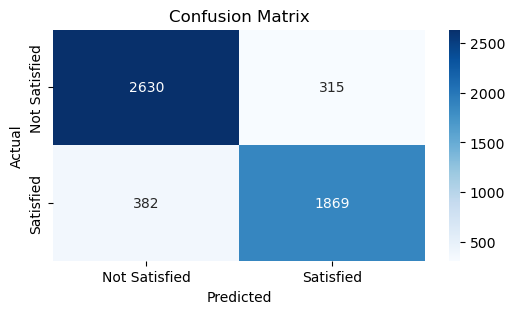

In [83]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# accuracy
accuracy = accuracy_score(Y_test, Y_pred)

# confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Generate classification report
class_report = classification_report(Y_test, Y_pred)

# Accuracy
print(f'Accuracy: {accuracy:.4f}')

# heatmap for the confusion matrix
plt.figure(figsize=(6, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Satisfied', 'Satisfied'], 
            yticklabels=['Not Satisfied', 'Satisfied'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()